In [529]:
import pandas as pd
import numpy as np

import sympy
from sympy import ordered, Matrix, hessian, Trace
from sympy.vector import laplacian, divergence, gradient, curl, CoordSys3D, Del
from sympy.plotting import plot3d 

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


Index(['Node Number', 'X Location (mm)', 'Y Location (mm)', 'Z Location (mm)',
       'Total Deformation (mm)'],
      dtype='object')


Text(0, 0.5, 'Deformation: H(x,y)')

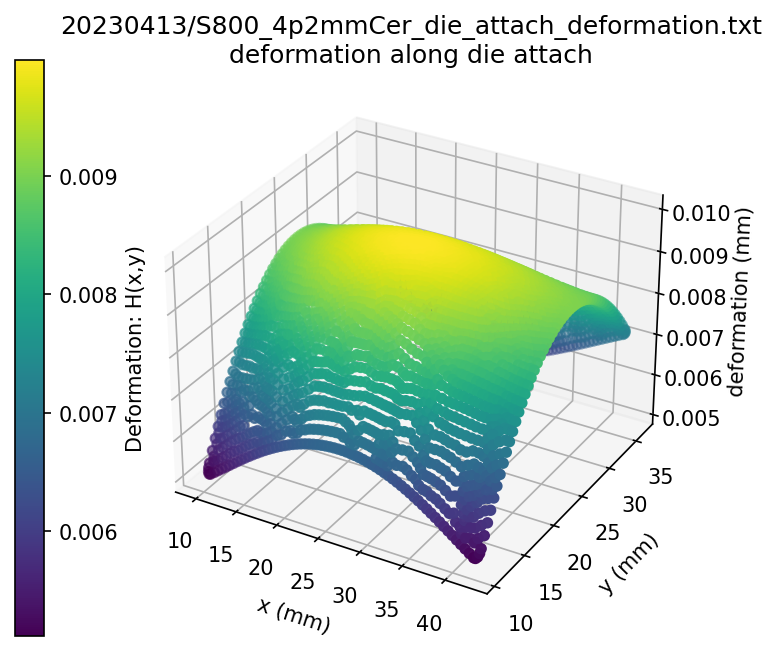

In [530]:
## Open Tab-seperated file with lsit of X,Y,z positions of data

folder = "20230413"
# filename = f"{folder}/S600_2p925mmCer_die_attach_deformation.txt"
# filename = f"{folder}/S600_3p785mmCer_die_attach_deformation.txt"
# filename = f"{folder}/S800_2p925mmCer_die_attach_deformation.txt"
# filename = f"{folder}/S800_3p2mmCer_die_attach_deformation.txt"
# filename = f"{folder}/S800_3p5mmCer_die_attach_deformation.txt"
# filename = f"{folder}/S800_3p785mmCer_die_attach_deformation.txt"
# filename = f"{folder}/S800_3p8mmCer_die_attach_deformation.txt"
# filename = f"{folder}/S800_3p9mmCer_die_attach_deformation.txt"
# filename = f"{folder}/S800_4p0mmCer_die_attach_deformation.txt"
# filename = f"{folder}/S800_4p1mmCer_die_attach_deformation.txt"
filename = f"{folder}/S800_4p2mmCer_die_attach_deformation.txt"

C_NODE = "Node Number"
C_X = "X Location (mm)"
C_Y = "Y Location (mm)"
C_Z = "Z Location (mm)"
C_DEF = "Total Deformation (mm)"

df = pd.read_csv(filename, sep="\t")
cols = df.columns
print(cols)
df

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')
# ax = plt.axes(projection='3d')
pcm = ax.scatter(df[C_X], df[C_Y], df[C_DEF], c=df[C_DEF], cmap='viridis')

ax.ticklabel_format(style='plain', axis='z', scilimits=(0, 0))
ax.set_title(f'{filename}\ndeformation along die attach')
ax.set_xlabel("x (mm)")
ax.set_ylabel("y (mm)")
ax.set_zlabel('deformation (mm)')
# ax.view_init(30, -145)

cbaxes = fig.add_axes([0.1, 0.1, 0.03, 0.8]) 
fig.colorbar(pcm, cax = cbaxes)
plt.ylabel("Deformation: H(x,y)")

Range = Min: (9.81,10.69)  Max: (42.44,36.31)
Note: Matrix forms have flipped y axis (upside-down)


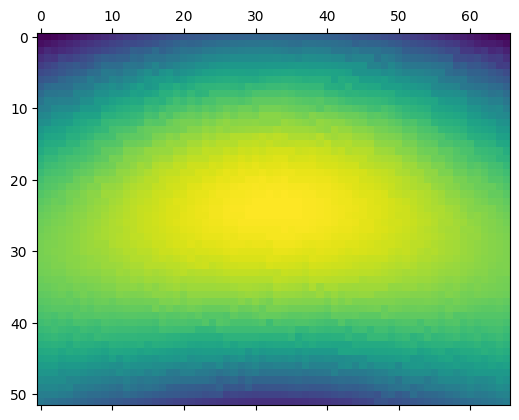

In [531]:
# Find bounding box of data
x_min = df.iloc[0][C_X]
y_min = df.iloc[0][C_Y]
x_max = df.iloc[0][C_X]
y_max = df.iloc[0][C_Y]
for index, row in df.iterrows():
    # print(row[C_X], row[C_Y])
    x = float(row[C_X])
    y = float(row[C_Y])
    if y > y_max:
        y_max = y
    if x > x_max:
        x_max = x
    if y < y_min:
        y_min = y
    if x < x_min:
        x_min = x

print(f"Range = Min: ({x_min},{y_min})  Max: ({x_max},{y_max})")

resolution = 0.5
x_steps = np.arange(x_min, x_max, resolution)
y_steps = np.arange(y_min, y_max, resolution)
nx = len(x_steps)
ny = len(y_steps)

data = []
for p_x in x_steps:
    for p_y in y_steps:
        df_closest = (
            df.copy(deep=True)
            .assign(d=(p_x - df[C_X]) ** 2 + (p_y - df[C_Y]) ** 2)
            .sort_values("d")
            .drop("d", axis=1)
        )
        # biased average
        # sum_dist = sum([(p_x - df_closest.iloc[i][C_X]) ** 2 + (p_y - df_closest.iloc[i][C_Y]) ** 2 for i in range(0,2)])
        # avg = (
        #     sum([df_closest.iloc[i][C_DEF] * ( (p_x - df_closest.iloc[i][C_X]) ** 2 + (p_y - df_closest.iloc[i][C_Y]) ** 2 )/sum_dist for i in range (0,2)])
        #     # / sum_dist
        # )
        # data.append({C_X: p_x, C_Y: p_y, C_DEF: avg})
        data.append({C_X: p_x, C_Y: p_y, C_DEF: df_closest.iloc[0][C_DEF]})

df_ortho = pd.DataFrame(data)

Z = np.empty((len(y_steps),0))
for x_pos in x_steps:
    col = []
    for y_pos in y_steps:
        df_val = df_ortho.loc[(df_ortho[C_X] == x_pos) & (df_ortho[C_Y] == y_pos)]
        col.append(df_val[C_DEF])
    npcol = np.vstack(col)
    Z = np.append(Z,npcol,1)

print("Note: Matrix forms have flipped y axis (upside-down)")
plt.matshow(Z)


In [532]:
## Generated Z test data

# fstr = "x**2+y**2"
# x_min =-5
# x_max=5
# y_min=-5
# y_max=5
# resolution = 0.5
# x_steps = np.arange(x_min, x_max, resolution)
# y_steps = np.arange(y_min, y_max, resolution)
# nx = len(x_steps)
# ny = len(y_steps)
# f = sympy.parsing.sympy_parser.parse_expr(fstr, evaluate=False)
# print(f)
# v = list(ordered(f.free_symbols)); v

# x = np.linspace(x_min, x_max, nx)
# y = np.linspace(y_min, y_max, ny)

# Z = np.empty(shape=(ny, nx))

# for i in range(len(x)):
#     for j in range(len(y)):
#         Z[j, i] = f.subs({v[0]: x[i], v[1]: y[j]})

# np.random.seed(42)
# noise_sigma = 0.001
# Z += noise_sigma * np.random.randn(*Z.shape)
# plt.matshow(Z)

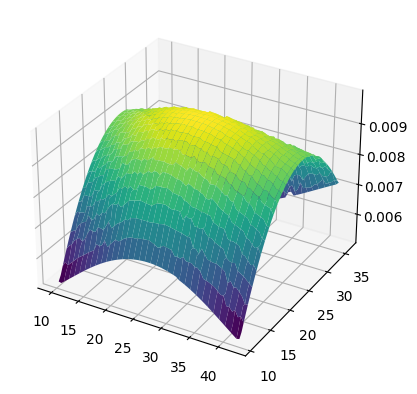

In [533]:
X, Y = np.meshgrid(x_steps, y_steps)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

The polynomial regression model: 1, x, x^2, ..., xy, x^2y, ... etc.

$$
z_i \,=\, c_0 + c_1 x_i + c_2 x_i^2 + \cdots + c_{i} y_{i} + c_{i} x_{i} y_{i} + c_i x_i^2 y_i + \cdots + c_m x_i^m y_i^m + \varepsilon_i\  (i = 1, 2, \dots , n) 
$$

can be expressed in matrix form in terms of a design matrix $\mathbf{A}$, a response vector $\vec y$, a parameter vector $\vec c$, and a vector $\vec\varepsilon$ of random errors. The ''i''-th row of $\mathbf{A}$ and $\vec y$ will contain the ''x'' and ''y'' value for the ''i''-th data sample. Then the model can be written as a system of linear equations:

$$
 \begin{bmatrix} z_1\\ z_2\\ z_3 \\ \vdots \\ z_n \end{bmatrix}= \begin{bmatrix} 1 & x_1 & x_1^2 & \dots & x_1^m y_1^m \\ 1 & x_2 & x_2^2 &  \dots & x_2^m y_2^m \\ 1 & x_3 & x_3^2 & \dots & x_3^m y_3^m \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_n & x_n^2 & \dots & x_n^m y_n^m \end{bmatrix} \begin{bmatrix} c_0\\ c_1\\ c_2\\ \vdots \\ c_{m^2} \end{bmatrix} + \begin{bmatrix} \varepsilon_1\\ \varepsilon_2\\ \varepsilon_3 \\ \vdots \\ \varepsilon_n \end{bmatrix}, 
$$

which when using pure matrix notation is written as

$$
\vec z = \mathbf{A} \vec c + \vec\varepsilon
$$

f(x,y) = -0.005099480109162937 * x**0 * y**0 + 9.720404650673501e-05 * x**1 * y**0 + 1.6120110543539254e-06 * x**2 * y**0 + -1.2274513810731924e-07 * x**3 * y**0 + 1.0511607818441786e-09 * x**4 * y**0 + 0.0009830598484972788 * x**0 * y**1 + 2.7180216672482738e-05 * x**1 * y**1 + -5.447855972182273e-07 * x**2 * y**1 + 4.368314915115289e-10 * x**3 * y**1 + -3.077225442910555e-05 * x**0 * y**2 + -1.0488992352866731e-06 * x**1 * y**2 + 2.0370620131924947e-08 * x**2 * y**2 + 6.56352384459335e-07 * x**0 * y**3 + -1.792913522521652e-10 * x**1 * y**3 + -6.959467725037045e-09 * x**0 * y**4
RMS residual = 5.108985068813313e-05


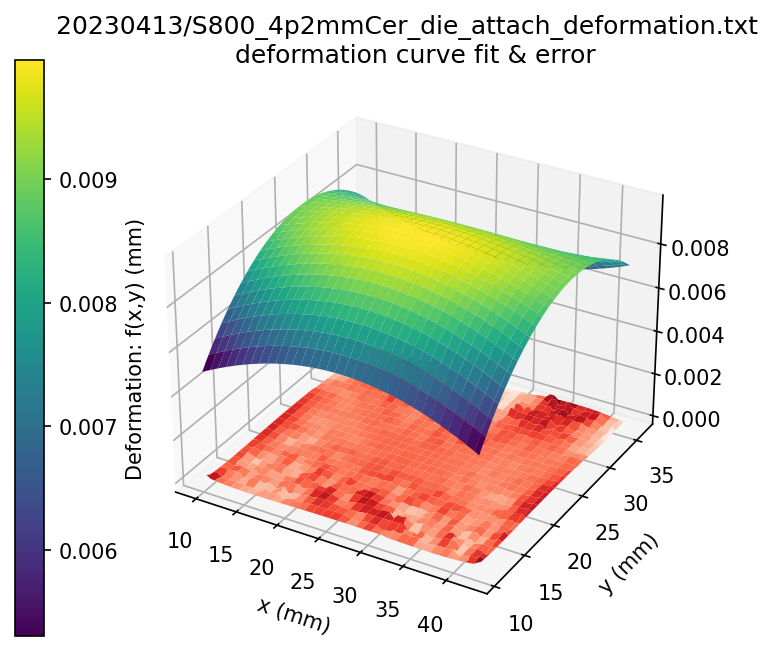

In [534]:
# https://scipython.com/blog/linear-least-squares-fitting-of-a-two-dimensional-data/


def get_basis(x, y, max_order=4):
    """Return the fit basis polynomials: 1, x, x^2, ..., xy, x^2y, ... etc."""
    basis = []
    for i in range(max_order+1):
        for j in range(max_order - i +1):
            basis.append(x**j * y**i)
    return basis

def get_basis_str(x, y, max_order=4):
    """Return the fit basis polynomials: 1, x, x^2, ..., xy, x^2y, ... etc."""
    basis_str = []
    for i in range(max_order+1):
        for j in range(max_order - i +1):
            basis_str.append(f'x**{j} * y**{i}')
    return basis_str

# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
x, y = X.ravel(), Y.ravel()
# Maximum order of polynomial term in the basis.
max_order = 4
basis = get_basis(x, y, max_order)
# Linear, least-squares fit.
A = np.vstack(basis).T
b = Z.ravel()

# https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
c, r, rank, s = np.linalg.lstsq(A, b, rcond=None)
# c is our basis coefficients

basis_str = get_basis_str(x, y, max_order)
fstr = ' + '.join([f'{c[i]} * {basis_str[i]}' for i in range(len(c))])
print("f(x,y) =", fstr)

# Calculate the fitted surface from the coefficients, c.
fit = np.sum(c[:, None, None] * np.array(get_basis(X, Y, max_order))
                .reshape(len(basis), *X.shape), axis=0)

rms = np.sqrt(np.mean((Z - fit)**2))
print('RMS residual =', rms)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')
plt.title(f'{filename} \n deformation curve fit & error')
pcm = ax.plot_surface(X, Y, fit, cmap='viridis')
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
# Adding the colorbar
cbaxes = fig.add_axes([0.1, 0.1, 0.03, 0.8]) 
fig.colorbar(pcm, cax = cbaxes)
plt.ylabel("Deformation: f(x,y) (mm)")
pcm = ax.plot_surface(X, Y, Z-fit, cmap='Reds')
# Add Labels

In [535]:
## 2D Gaussian Distribution Test
# fstr = "(1/(2*pi*1**2))*exp(-(x**2+y**2)/(2*1**2))"
# x_min =-3
# x_max=3
# y_min=-3
# y_max=3
# resolution = 0.3
# x_steps = np.arange(x_min, x_max, resolution)
# y_steps = np.arange(y_min, y_max, resolution)
# nx = len(x_steps)
# ny = len(y_steps)

In [536]:
f = sympy.parsing.sympy_parser.parse_expr(fstr, evaluate=False)
f

1.0511607818441786e-9*x**4*y**0 + 4.368314915115289e-10*x**3*y**1 - 1.2274513810731924e-7*x**3*y**0 + 2.0370620131924947e-8*x**2*y**2 - 5.447855972182273e-7*x**2*y**1 + 1.6120110543539254e-6*x**2*y**0 - 1.792913522521652e-10*x**1*y**3 - 1.0488992352866731e-6*x**1*y**2 + 2.7180216672482738e-5*x**1*y**1 + 9.720404650673501e-5*x**1*y**0 - 6.959467725037045e-9*x**0*y**4 + 6.56352384459335e-7*x**0*y**3 - 3.077225442910555e-5*x**0*y**2 + 0.0009830598484972788*x**0*y**1 - 0.005099480109162937*x**0*y**0

In [537]:
# get our variables
v = list(ordered(f.free_symbols)); v

[x, y]

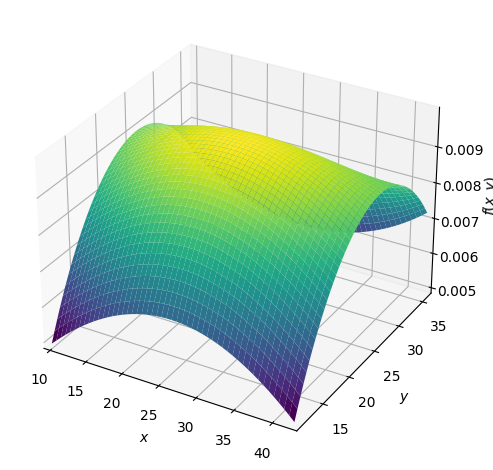

In [538]:
pcm = plot3d(f, (v[0], x_min, x_max), (v[1], y_min, y_max))

In [539]:
gradient = lambda f, v: Matrix([f]).jacobian(v)
g = gradient(f, v)
g

Matrix([[4.2046431273767144e-9*x**3 + 1.310494474534587e-9*x**2*y - 3.6823541432195772e-7*x**2 + 4.0741240263849894e-8*x*y**2 - 1.089571194436455e-6*x*y + 3.2240221087078508e-6*x - 1.792913522521652e-10*y**3 - 1.0488992352866731e-6*y**2 + 2.7180216672482738e-5*y + 9.720404650673501e-5, 4.368314915115289e-10*x**3 + 4.0741240263849894e-8*x**2*y - 5.447855972182273e-7*x**2 - 5.378740567564956e-10*x*y**2 - 2.0977984705733462e-6*x*y + 2.7180216672482738e-5*x - 2.783787090014818e-8*y**3 + 1.969057153378e-6*y**2 - 6.15445088582111e-5*y + 0.0009830598484972788]])

In [540]:
h = hessian(f, v)
h

Matrix([
[1.2613929382130143e-8*x**2 + 2.620988949069173e-9*x*y - 7.3647082864391544e-7*x + 4.0741240263849894e-8*y**2 - 1.089571194436455e-6*y + 3.2240221087078508e-6, 1.310494474534587e-9*x**2 + 8.1482480527699788e-8*x*y - 1.089571194436455e-6*x - 5.378740567564956e-10*y**2 - 2.0977984705733462e-6*y + 2.7180216672482738e-5],
[1.310494474534587e-9*x**2 + 8.1482480527699788e-8*x*y - 1.089571194436455e-6*x - 5.378740567564956e-10*y**2 - 2.0977984705733462e-6*y + 2.7180216672482738e-5,     4.0741240263849894e-8*x**2 - 1.075748113512991e-9*x*y - 2.0977984705733462e-6*x - 8.351361270044454e-8*y**2 + 3.93811430675601e-6*y - 6.15445088582111e-5]])

In [541]:
# laplacian
# l = divergence(gradient(f,v), v)
# l = f.diff(v[0]).diff(v[0]) + f.diff(v[1]).diff(v[1])
# l = Trace(h)
l = h.trace()
l

5.3355169645980037e-8*x**2 + 1.545240835556182e-9*x*y - 2.8342692992172616e-6*x - 4.2772372436594646e-8*y**2 + 2.848543112319555e-6*y - 5.832048674950325e-5

The '''mean curvature''' at $p\in S$ is then the average of the signed curvature over all angles $\theta$:
$$
H = \frac{1}{2\pi}\int_0^{2\pi} \kappa(\theta) \;d\theta
$$

By applying [[Euler's theorem (differential geometry)|Euler's theorem]], this is equal to the average of the principal curvatures {{harv|Spivak|1999|loc=Volume 3, Chapter 2}}:
$$
H = {1 \over 2} (\kappa_1 + \kappa_2)
$$

For the special case of a surface defined as a function of two coordinates, e.g. $z = S(x, y)$, and using the upward pointing normal the mean curvature expression is

$$
H = \frac{1}{2}
\frac{
\left(1 + \left(\frac{\partial S}{\partial x}\right)^2\right) \frac{\partial^2 S}{\partial y^2} - 
2 \frac{\partial S}{\partial x} \frac{\partial S}{\partial y} \frac{\partial^2 S}{\partial x \partial y} + 
\left(1 + \left(\frac{\partial S}{\partial y}\right)^2\right) \frac{\partial^2 S}{\partial x^2}
}{\left(1 + \left(\frac{\partial S}{\partial x}\right)^2 + \left(\frac{\partial S}{\partial y}\right)^2\right)^{3/2}}
$$


Gaussian curvature is defined as

$$
K = \kappa_1 \kappa_2
$$

Similarly, for a surface described as graph of a function $z = S(x, y)$, Gaussian curvature is:

<!-- $$
K = \frac{F_{xx}\cdot F_{yy}- F_{xy}^2}{\left(1+F_x^2+ F_y^2\right)^2}
$$ -->

$$
K = \frac{\frac{\partial^2 S}{\partial x^2} \cdot \frac{\partial^2 S}{\partial y^2} - \left( \frac{\partial^2 S}{\partial x \partial y} \right)^2}
{\left( 1 + \left( \frac{\partial S}{\partial x} \right)^2 + \left( \frac{\partial S}{\partial x} \right)^2 \right)^2}
$$

Principal curvature, $\kappa$ , can be the defined as

$$
\kappa_1 = H + \sqrt{H^2 - K}
$$
$$
\kappa_2 = H - \sqrt{H^2 - K}
$$

With $\kappa_1$ represnting the maximum and $\kappa_2$ beign the minimum

Knowing $\kappa$ , the equation for radius of curvature is 
$$
% \kappa = \frac{1}{r}
r= \frac{1}{\kappa }
$$

Let {{mvar|S}} be a regular surface in {{math|ℝ<sup>3</sup>}}. Given a local parametrization {{math|''f'' : ''V'' → ''S''}} and a unit normal vector field {{mvar|n}} to {{math|''f''(''V'')}}, one defines the following objects as real-valued or matrix-valued functions on {{mvar|V}}. The first fundamental form depends only on {{mvar|f}}, and not on {{mvar|n}}. The fourth column records the way in which these functions depend on {{mvar|f}}, by relating the functions {{math|''E'' ′, ''F'' ′, ''G'' ′, ''L'' ′, }} etc., arising for a different choice of local parametrization, $f′ : V′  → S$, to those arising for {{mvar|f}}. Here {{mvar|A}} denotes the [[Jacobian matrix and determinant|Jacobian matrix]] of {{math|''f''<sup> –1</sup> ∘ ''f'' ′}}. The key relation in establishing the formulas of the fourth column is then
:$\begin{pmatrix}\frac{\partial f'}{\partial u}\\ \frac{\partial f'}{\partial v}\end{pmatrix}=A\begin{pmatrix}\frac{\partial f}{\partial u}\\ \frac{\partial f}{\partial v}\end{pmatrix},$
as follows by the [[chain rule]].

| Terminology                 | Notation                      | Definition                                                                     | Dependence on local parametrization                                            |
|-----------------------------|-------------------------------|--------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| First fundamental form      | $E$                           | $E=\frac{\partial f}{\partial u}\cdot\frac{\partial f}{\partial u}$ | $\begin{pmatrix}E'&F'\\ F'&G'\end{pmatrix}=A\begin{pmatrix}E&F\\ F&G\end{pmatrix}A^T$ |
|                             | $F$                           | $F=\frac{\partial f}{\partial u}\cdot\frac{\partial f}{\partial v}$ |
|                             | $G$                           | $G=\frac{\partial f}{\partial v}\cdot\frac{\partial f}{\partial v}$ |
| Second fundamental form     | $L$                           | $L=\frac{\partial^2 f}{\partial u^2}\cdot n$                        | $\begin{pmatrix}L'&M'\\ M'&N'\end{pmatrix}=A\begin{pmatrix}L&M\\ M&N\end{pmatrix}A^T$ |
|                             | $M$                           | $M=\frac{\partial^2f}{\partial u\partial v}\cdot n$                 |
|                             | $N$                           | $N=\frac{\partial^2f}{\partial v^2}\cdot n$                         |
| Shape operator              | $P$                           | $P=\begin{pmatrix}L&M\\ M&N\end{pmatrix}\begin{pmatrix}E&F\\ F&G\end{pmatrix}^{-1}$ | $P'=APA^{-1}$ |
| Gaussian curvature          | $K$                           | $K=\frac{LN-M^2}{EG-F^2}$                                           | $K'=K$                                                                                |
| Mean curvature              | $H$                           | $H=\frac{GL-2FM+EN}{2(EG-F^2)}$                                     | $H'=H$                                                                                |
| Principal curvatures        | $\kappa_\pm$       | $H\pm\sqrt{H^2-K}$                                                  | $\kappa_{\pm}'=\kappa_\pm$                                          |



The following summarizes the calculation of the above quantities relative to a Monge patch $f(u, v) = (u, v, h(u, v))$. Here $h_u$ and $h_v$ denote the two partial derivatives of $h$, with analogous notation for the second partial derivatives. The second fundamental form and all subsequent quantities are calculated relative to the given choice of unit normal vector field.

| Quantity                   | Formula                                                                                                                                                                                         |
|----------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| A unit normal vector field | $n=\frac{(-h_u,-h_v,1)}{\sqrt{1+h_u^2+h_v^2}}$                                                                                                                                       |
| First fundamental form     | $\begin{pmatrix}E&F\\ F&G\end{pmatrix}=\begin{pmatrix} 1 +h_u^2 & h_u h_v \\ h_u h_v & 1 + h_v^2\end{pmatrix}$                                                                       |
| Second fundamental form    | $\begin{pmatrix}L&M\\ M&N\end{pmatrix}=\frac{1}{\sqrt{1 +h_u^2 + h_v^2}} \begin{pmatrix} h_{uu} & h_{uv} \\ h_{uv} & h_{vv} \end{pmatrix}$                                           |
| Shape operator             | $P=\frac{1}{(1+h_u^2+h_v^2)^{3/2}}\begin{pmatrix}h_{uu}(1+h_v^2)-h_{uv}h_uh_v&h_{uv}(1+h_u^2)-h_{uu}h_uh_v\\ h_{uv}(1+h_v^2)-h_{vv}h_uh_v&h_{vv}(1+h_u^2)-h_{uv}h_uh_v\end{pmatrix}$ |
| Gaussian curvature         | $K=\frac{h_{uu}h_{vv}-h_{uv}^2}{(1+h_u^2+h_v^2)^2}$                                                                                                                                  |
| Mean curvature             | $H=\frac{(1+h_v^2)h_{uu}-2h_uh_vh_{uv}+(1+h_u^2)h_{vv}}{2(1+h_u^2+h_v^2)^{3/2}}$                                                                                                     |


If $p∈M$, then for each tangent vector $v$ to $M$ at $p$, define the shape operator:

$$
S_p(v) = - \nabla_v U
$$
Where $U$ is a normal vector field to $M$ defined in a neighborhood of $p$.

We can also talk about principal curvature in terms of the shape operator, which is the unique map $S: TM \rarr TM$
 satisfying

$$
df(SX) = dN(X)
$$

for all tangent vectors $X$. The shape operator $S$ and the Weingarten map $dN$ essentially represent the same idea: they both tell us how the normal changes as we travel along a direction $X$. The only difference is that $S$ specifies this 
change in terms of a tangent vector on $M$, whereas $dN$ gives us the change as a tangent vector in $\mathbb{R}^3$.

By a direct calculation with the matrix defining the shape operator, it can be checked that the Gaussian curvature is the determinant of the shape operator, the mean curvature is half of the trace of the shape operator, and the principal curvatures are the eigenvalues of the shape operator with their directions being the corresponding eigenvectors; moreover the Gaussian curvature is the product of the principal curvatures and the mean curvature is their sum.

In [542]:
def mean_curvature_implicit(f, v):
    """
    f is an implicit sympy expression: f(xy)
    The Gaussian curvature is the product of the two principal curvatures, so it is 1/mm^2.
    """
    # https://en.wikipedia.org/wiki/Mean_curvature
    f_x, f_y = gradient(f, v)
    f_xx, f_xy = gradient(f_x, v)
    f_yx, f_yy = gradient(f_y, v)
    H = (((1 + f_x**2)*f_yy - 2*f_x*f_y*f_xy + (1 + f_y**2)*f_xx) / ((1 + f_x**2 + f_y**2)**(3/2)))/2
    return H

def gaussian_curvature_implicit(f, v):
    """
    f is an implitit sympy expression: f(xy)
    """
    # https://en.wikipedia.org/wiki/Gaussian_curvature
    f_x, f_y = gradient(f, v)
    f_xx, f_xy = gradient(f_x, v)
    f_yx, f_yy = gradient(f_y, v)
    K = (f_xx*f_yy-f_xy**2)/((1+f_x**2+f_y**2)**2)
    return K


def pricipal_curvature_implicit_monge(h, params, p=[0,0]):
    u,v = params
    f = Matrix([u, v, h])
    # df = gradient(f, (u,v))
    df = f.diff(u) + f.diff(v)

    h_u = h.diff(u)
    h_v = h.diff(v)
    h_uu = h_u.diff(u)
    h_uv = h_u.diff(v)
    h_vv = h_v.diff(v)

    # n =  sympy.Matrix([-h_u,-h_v,1]) / sympy.sqrt(1 + h_u**2 + h_v**2)
    # n = n.subs({u: p[0], v: p[1]})

    E = 1+h_u**2
    F = h_u*h_v
    G = 1+h_v**2
    denom = sympy.sqrt(1 + h_u**2 + h_v**2)
    L = h_uu / denom
    M = h_uv / denom
    N = h_vv / denom
    S = sympy.Matrix([[L,M],[M,N]]) * sympy.Matrix([[E,F],[F,G]]).T
    
    S = S.subs({u: p[0], v: p[1]})
    X = S.eigenvects() #returns eigenvalues, eigenvects

    k1 = X[0][0]
    k2 = X[1][0]
    X1 = X[0][2][0]
    X2 = X[1][2][0]
    # calculate the curvature vector of the surface
    k1vec = sympy.Matrix([X1[0],X1[1],df.subs({u: X1[0], v: X1[1]})])
    k2vec = sympy.Matrix([X2[0],X2[1],df.subs({u: X2[0], v: X2[1]})])

    return k1,k2,k1vec,k2vec


def pricipal_curvature_implicit_parametric(f, v, p=[0,0]):
    """
    df is the sympy expression of derivative of parametric function f. df(u,v) -> [x,y,z]
    N is the sympy exprssion for the normal vector field. N(u,v) -> [x,y,z]
    v is the array of vartiables. [u,v]
    p is the point to solve for [0,0]
    """
    ## Get normal vector field
    df = gradient(f, v)
    N = f.diff(v[0]).cross(f.diff(v[1]))
    S = -gradient(N, v)#.subs({v[0]: p[0], v[1]: p[1]})
    S.row_del(2)
    
    S = S.subs({v[0]: p[0], v[1]: p[1]})
    X = S.eigenvects() #returns eigenvalues, eigenvects

    k1 = X[0][0]
    k2 = X[1][0]
    X1 = X[0][2][0]
    X2 = X[1][2][0]
    # calculate the curvature vector of the surface
    k1vec = (df * X1).subs({v[0]: p[0], v[1]: p[1]})
    k2vec = (df * X2).subs({v[0]: p[0], v[1]: p[1]})

    return k1,k2,k1vec,k2vec
    

def mean_curvature_orthodiscrete_monge(Z):
    """
    X is a 2D array, Y is a 2D array, and Z is a 2D array. If you have an unstructured cloudpoint, with a single matrix shaped Nx3 (the first column being X, the second being Y and the third being Z) then you can't apply this matlab function.
    This assumes that your data points are 1 unit apart.
    """
    # https://stackoverflow.com/questions/11317579/surface-curvature-matlab-equivalent-in-python
    Zy, Zx  = np.gradient(Z)
    Zxy, Zxx = np.gradient(Zx)
    Zyy, _ = np.gradient(Zy)

    H = (Zx**2 + 1)*Zyy - 2*Zx*Zy*Zxy + (Zy**2 + 1)*Zxx
    H = H/(2*(Zx**2 + Zy**2 + 1)**(1.5))

    return H

def gaussian_curvature_orthodiscrete_monge(Z):
    """
    Z is a 2D array
    The curvature in general is measured as 1/r, where r is the radius of an inscribed circle. Since mean curvature is the average of the two principal curvatures it has the units of 1/mm. The Gaussian curvature is the product of them, so it is 1/mm^2.
    """
    # https://stackoverflow.com/questions/11317579/surface-curvature-matlab-equivalent-in-python
    Zy, Zx = np.gradient(Z)                                                     
    Zxy, Zxx = np.gradient(Zx)                                                  
    Zyy, _ = np.gradient(Zy)                                                    
    K = (Zxx * Zyy - (Zxy ** 2)) /  (1 + (Zx ** 2) + (Zy **2)) ** 2             
    return K

def surfature_orthodiscrete_parametric(X,Y,Z):
    # https://github.com/sujithTSR/surface-curvature/blob/master/surface.py
    # where X, Y, Z matrices have a shape (lr+1,lb+1)

    (lr,lb)=X.shape

    #First Derivatives
    Xv,Xu=np.gradient(X)
    Yv,Yu=np.gradient(Y)
    Zv,Zu=np.gradient(Z)

    #Second Derivatives
    Xuv,Xuu=np.gradient(Xu)
    Yuv,Yuu=np.gradient(Yu)
    Zuv,Zuu=np.gradient(Zu)   

    Xvv,Xuv=np.gradient(Xv)
    Yvv,Yuv=np.gradient(Yv)
    Zvv,Zuv=np.gradient(Zv) 

    #Reshape to 1D vectors
    Xu=np.reshape(Xu,lr*lb)
    Yu=np.reshape(Yu,lr*lb)
    Zu=np.reshape(Zu,lr*lb)
    Xv=np.reshape(Xv,lr*lb)
    Yv=np.reshape(Yv,lr*lb)
    Zv=np.reshape(Zv,lr*lb)
    Xuu=np.reshape(Xuu,lr*lb)
    Yuu=np.reshape(Yuu,lr*lb)
    Zuu=np.reshape(Zuu,lr*lb)
    Xuv=np.reshape(Xuv,lr*lb)
    Yuv=np.reshape(Yuv,lr*lb)
    Zuv=np.reshape(Zuv,lr*lb)
    Xvv=np.reshape(Xvv,lr*lb)
    Yvv=np.reshape(Yvv,lr*lb)
    Zvv=np.reshape(Zvv,lr*lb)

    Xu=np.c_[Xu, Yu, Zu]
    Xv=np.c_[Xv, Yv, Zv]
    Xuu=np.c_[Xuu, Yuu, Zuu]
    Xuv=np.c_[Xuv, Yuv, Zuv]
    Xvv=np.c_[Xvv, Yvv, Zvv]

    #% First fundamental Coeffecients of the surface (E,F,G)
    E=np.einsum('ij,ij->i', Xu, Xu) 
    F=np.einsum('ij,ij->i', Xu, Xv) 
    G=np.einsum('ij,ij->i', Xv, Xv) 

    m=np.cross(Xu,Xv,axisa=1, axisb=1)
    p=np.sqrt(np.einsum('ij,ij->i', m, m))
    n=m/np.c_[p,p,p]

    #% Second fundamental Coeffecients of the surface (L,M,N)
    L= np.einsum('ij,ij->i', Xuu, n) 
    M= np.einsum('ij,ij->i', Xuv, n) 
    N= np.einsum('ij,ij->i', Xvv, n) 

    #% Gaussian Curvature
    K=(L*N-M**2)/(E*G-F**2)
    K=np.reshape(K,lr*lb)

    # return K

    #% Mean Curvature
    H = (E*N + G*L - 2*F*M)/(2*(E*G - F**2))
    # H = np.reshape(H,lr*lb)
    H = np.reshape(H,(lr,lb))

    # return H

    # #% Principal Curvatures
    Pmax = H + np.sqrt(H**2 - K)
    Pmin = H - np.sqrt(H**2 - K)

    return Pmax,Pmin

https://math.stackexchange.com/questions/1985889/why-how-does-the-determinant-of-the-hessian-matrix-combined-with-the-2nd-deriva 

https://machinelearningmastery.com/a-gentle-introduction-to-the-laplacian/

https://mathworld.wolfram.com/MeanCurvature.html

https://en.wikipedia.org/wiki/Principal_curvature

https://en.wikipedia.org/wiki/Mean_curvature

https://en.wikipedia.org/wiki/Gaussian_curvature




((9.664066657274928e-7*(4.443590002981778e-7*x**3 + 4.1443295976463298e-5*x**2*y - 0.0005541733782037741*x**2 - 5.471427376254849e-7*x*y**2 - 0.0021339478708036697*x*y + 0.02764858794104027*x - 2.83175749093014e-5*y**3 + 0.002002988074823661*y**2 - 0.06260504785368768*y + 1)**2 + 1)*(1.2613929382130143e-8*x**2 + 2.620988949069173e-9*x*y - 7.3647082864391544e-7*x + 4.0741240263849894e-8*y**2 - 1.089571194436455e-6*y + 3.2240221087078508e-6) + (9.448626657283503e-9*(4.3255844571093919e-5*x**3 + 1.348189218073124e-5*x**2*y - 0.0037882724799573407*x**2 + 0.00041913111365201285*x*y**2 - 0.01120911354612137*x*y + 0.033167570945562095*x - 1.844484449932263e-6*y**3 - 0.010790695171460765*y**2 + 0.27962021797723712*y + 1)**2 + 1)*(4.0741240263849894e-8*x**2 - 1.075748113512991e-9*x*y - 2.0977984705733462e-6*x - 8.351361270044454e-8*y**2 + 3.93811430675601e-6*y - 6.15445088582111e-5) - (1.310494474534587e-9*x**2 + 8.1482480527699788e-8*x*y - 1.089571194436455e-6*x - 5.378740567564956e-10*y**2 - 

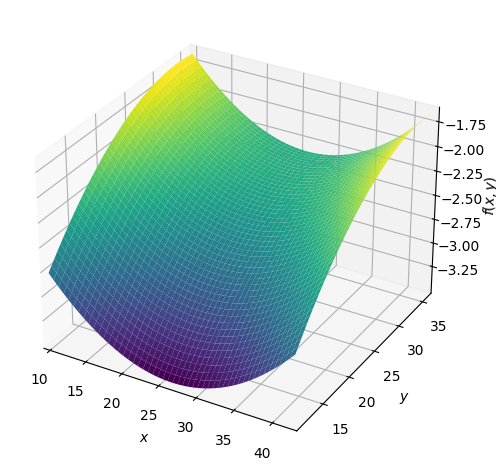

In [543]:
H = mean_curvature_implicit(f, v)
display(H)
plot3d(H, (v[0], x_min, x_max), (v[1], y_min, y_max))

((1.2613929382130143e-8*x**2 + 2.620988949069173e-9*x*y - 7.3647082864391544e-7*x + 4.0741240263849894e-8*y**2 - 1.089571194436455e-6*y + 3.2240221087078508e-6)*(4.0741240263849894e-8*x**2 - 1.075748113512991e-9*x*y - 2.0977984705733462e-6*x - 8.351361270044454e-8*y**2 + 3.93811430675601e-6*y - 6.15445088582111e-5) - 7.387641783631086e-10*(4.8215012055490044e-5*x**2 + 0.0029978598592333034*x*y - 0.040086920850029018*x - 1.9789174723578988e-5*y**2 - 0.077181079748240498*y + 1)**2)/(9.664066657274928e-7*(4.443590002981778e-7*x**3 + 4.1443295976463298e-5*x**2*y - 0.0005541733782037741*x**2 - 5.471427376254849e-7*x*y**2 - 0.0021339478708036697*x*y + 0.02764858794104027*x - 2.83175749093014e-5*y**3 + 0.002002988074823661*y**2 - 0.06260504785368768*y + 1)**2 + 9.448626657283503e-9*(4.3255844571093919e-5*x**3 + 1.348189218073124e-5*x**2*y - 0.0037882724799573407*x**2 + 0.00041913111365201285*x*y**2 - 0.01120911354612137*x*y + 0.033167570945562095*x - 1.844484449932263e-6*y**3 - 0.010790695171

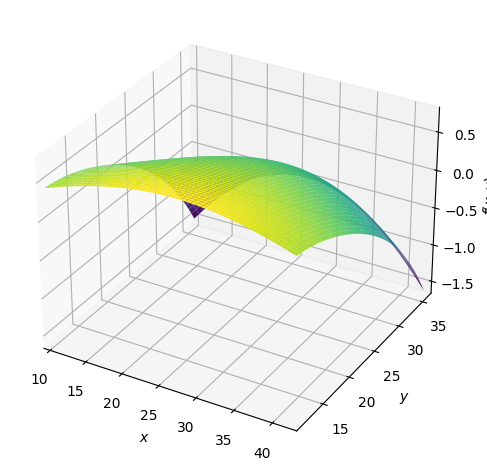

In [544]:
K = gaussian_curvature_implicit(f,v)
display(K)
plot3d(K, (v[0], x_min, x_max), (v[1], y_min, y_max))

Discretize the function (Convert to 2D Vector) so we can easily find max and min

It makes sense to define an always positive number c, henceforth referred to as the ‘curvedness’, to specify the amount, or ‘intensity’ of the surface curvature. Although several alternative definitions would serve, I chose:
$$
C = \sqrt{\frac{\kappa_1^2 + \kappa_2^2}{2}}
$$
This is similar to the RMS equation, essentially stating that it is the positive valued mean curvature.

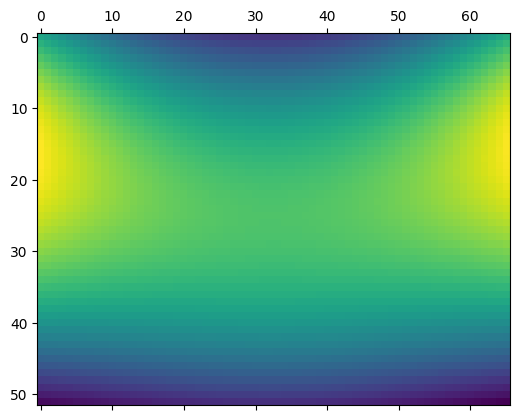

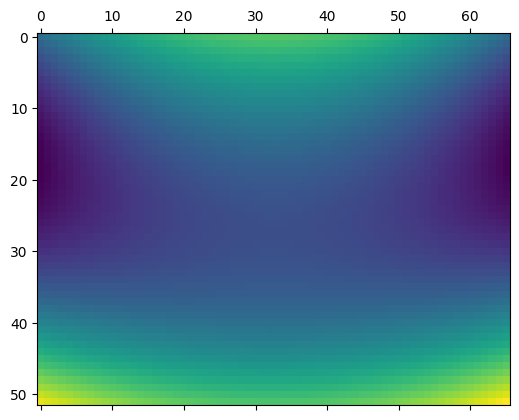

In [545]:
xrange = np.linspace(x_min, x_max, nx)
yrange = np.linspace(y_min, y_max, ny)
X,Y = np.meshgrid(xrange, yrange)
Z = np.empty(shape=(ny, nx))

H_a = np.empty(shape=(ny, nx))
K_a = np.empty(shape=(ny, nx))
P_absmax_a = np.empty(shape=(ny, nx))
# Curvedness
C_a = np.empty(shape=(ny, nx))

k1U = np.empty(shape=(ny, nx))
k1V = np.empty(shape=(ny, nx))
k1W = np.empty(shape=(ny, nx))
k2U = np.empty(shape=(ny, nx))
k2V = np.empty(shape=(ny, nx))
k2W = np.empty(shape=(ny, nx))

# Implicit 2D mean curvature
# H = mean_curvature_implicit(f, v)
# K = gaussian_curvature_implicit(f, v)

## Convert move form to parametic: f_(u,v) -> [u,v,f(u,v)]
# f_ = Matrix([v[0], v[1], f])
## Get normal vector field
# df = gradient(f_, v)
# N = f_.diff(v[0]).cross(f_.diff(v[1]))

for i in range(len(xrange)):
    for j in range(len(yrange)):
        Z[j, i] = f.subs({v[0]: xrange[i], v[1]: yrange[j]})

        # H_a[j, i] = H.subs({v[0]: x[i], v[1]: y[j]})
        # K_a[j, i] = K.subs({v[0]: x[i], v[1]: y[j]})

        # Pmax = (H + (H**2 - K)**(1/2)).subs({v[0]: x[i], v[1]: y[j]})
        # Pmin = (H - (H**2 - K)**(1/2)).subs({v[0]: x[i], v[1]: y[j]})
        # P_absmax_a[j, i] = max([Pmax, Pmin], key=lambda x: abs(x))

        point = [xrange[i],yrange[j]]
        # k1,k2,k1vec,k2vec = pricipal_curvature_implicit_parametric(f,v,point)
        k1,k2,k1vec,k2vec = pricipal_curvature_implicit_monge(f,v,point)

        P_absmax_a[j, i] = max([k1, k2], key=lambda x: abs(x))
        C_a[j, i] = sympy.sqrt((k1**2 + k2**2)/2)
        k1U[j, i] = k1vec[0] * k1
        k1V[j, i] = k1vec[1] * k1
        k1W[j, i] = k1vec[2] * k1
        k2U[j, i] = k2vec[0] * k2
        k2V[j, i] = k2vec[1] * k2
        k2W[j, i] = k2vec[2] * k2


# Finite mean curvature
# for i in range(len(x)):
#     for j in range(len(y)):
#         a[j, i] = f.subs({v[0]: x[i], v[1]: y[j]})
# plt.matshow(a)

# a = mean_curvature_orthodiscrete(a)
# a = gaussian_curvature_orthodiscrete(a)

# X, Y = np.meshgrid(x, y)
# a = surfature(X,Y,a)

# plt.matshow(H_a)
# plt.matshow(K_a)
plt.matshow(P_absmax_a)
plt.matshow(C_a)

In [546]:
print(f'{filename}')
print()
print('Prinicpal Curvature')
max_i,max_j = np.unravel_index(P_absmax_a.argmax(), P_absmax_a.shape)
min_i,min_j = np.unravel_index(P_absmax_a.argmin(), P_absmax_a.shape)
print(f'Min= {P_absmax_a.min()} rc={min_i,min_j} xy={min_j*resolution,min_i*resolution}')
print(f'Max= {P_absmax_a.max()} rc={max_i,max_j} xy={max_j*resolution,max_i*resolution}')
print(f'Avg= {P_absmax_a.mean()}')
print(f"Absolute maximum principal curvature: {max([P_absmax_a.max(), P_absmax_a.min()], key=lambda x: abs(x))}")
print()
print('Curvedness')
max_i,max_j = np.unravel_index(C_a.argmax(), C_a.shape)
min_i,min_j = np.unravel_index(C_a.argmin(), C_a.shape)
print(f'Min= {C_a.min()} rc={min_i,min_j} xy={min_j*resolution,min_i*resolution}')
print(f'Max= {C_a.max()} rc={max_i,max_j} xy={max_j*resolution,max_i*resolution}')
print(f'Avg= {C_a.mean()}')

20230413/S800_4p2mmCer_die_attach_deformation.txt

Prinicpal Curvature
Min= -6.0000352338381176e-05 rc=(51, 65) xy=(32.5, 25.5)
Max= -3.617078739929889e-05 rc=(17, 0) xy=(0.0, 8.5)
Avg= -4.603341821360198e-05
Absolute maximum principal curvature: -6.0000352338381176e-05

Curvedness
Min= 2.584602938474003e-05 rc=(18, 0) xy=(0.0, 9.0)
Max= 4.649959455533982e-05 rc=(51, 65) xy=(32.5, 25.5)
Avg= 3.3259368751032674e-05


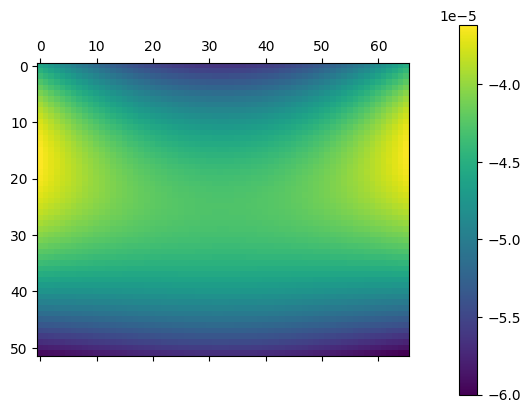

In [547]:
fig = plt.figure()
ax = fig.add_subplot(111)
pcm = ax.matshow(P_absmax_a) 
fig.colorbar(pcm, pad=0.1)

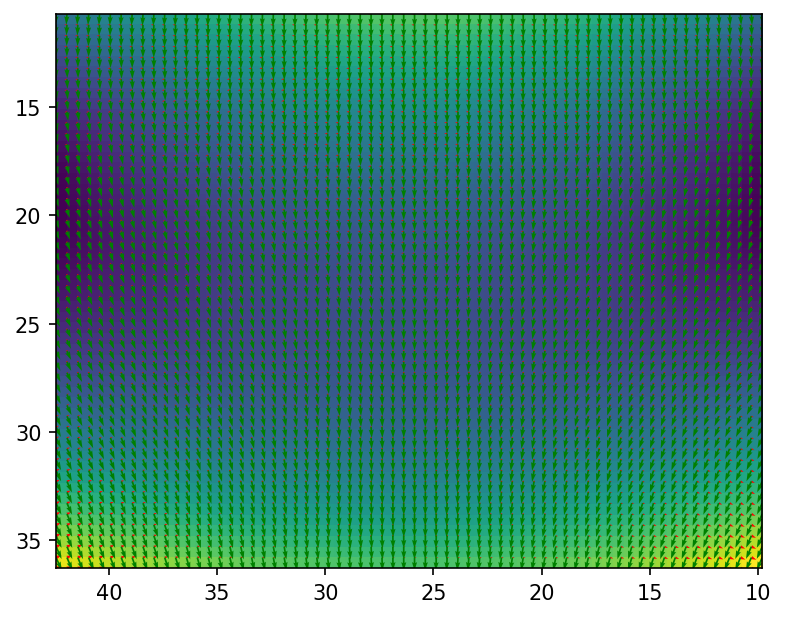

In [551]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
# ax.imshow(P_absmax_a, extent=[x_max, x_min, y_max, y_min])
ax.imshow(C_a, extent=[x_max, x_min, y_max, y_min])
# ax.imshow(Z, extent=[x_max, x_min, y_max, y_min])
ax.quiver(X, Y, k1U, k1V,color='r',scale=0.003)
ax.quiver(X, Y, k2U, k2V,color='g',scale=0.003)

Text(0, 0.5, 'Curvedess: C(x,y)')

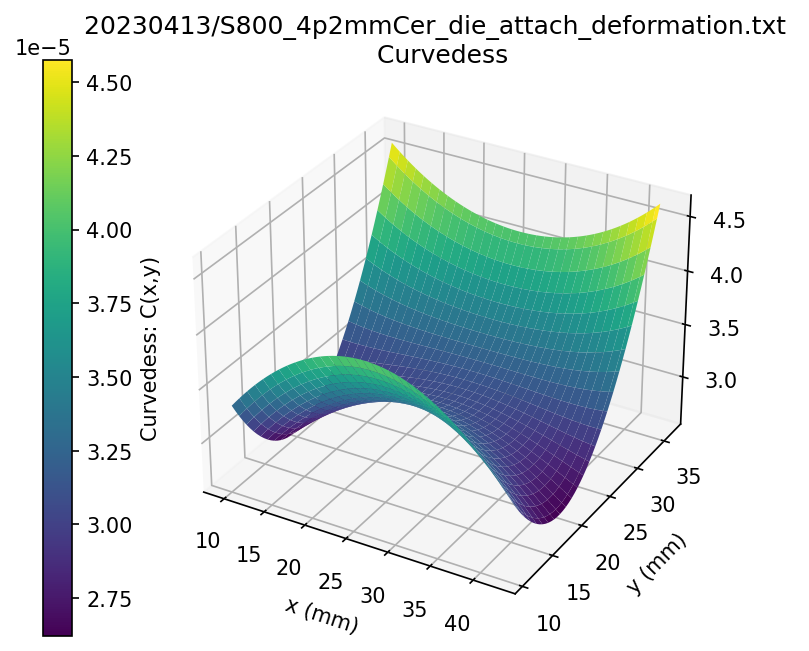

In [549]:
from matplotlib.colors import TwoSlopeNorm

X, Y = np.meshgrid(xrange, yrange)

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')
plt.title(f'{filename} \n Curvedess')
asm = ax.plot_surface(X, Y, C_a, cmap='viridis') # cmap='viridis' / cmap='PiYG', norm=TwoSlopeNorm(vcenter=0) /  P_absmax_a / abs(P_absmax_a)
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

cbaxes = fig.add_axes([0.1, 0.1, 0.03, 0.8]) 
fig.colorbar(asm, cax = cbaxes)
# plt.ylabel("Max Principal Curvature: k(x,y)")
plt.ylabel("Curvedess: C(x,y)")
# ax.quiver(X, Y, C_a, k1U, k1V, k1W,color='g', length=0.05)
# ax.view_init(30, -125)